In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
%matplotlib inline

# 1. Read Data And Overview Data

In [100]:
df = pd.read_csv('Xeek_Well_15-9-15.csv')

In [4]:
df.isnull().mean()*100

WELL          0.000000
DEPTH_MD      0.000000
GROUP         0.000000
FORMATION    14.810634
CALI          0.462832
RDEP          0.000000
RHOB          1.106282
GR            0.000000
NPHI         24.671220
PEF           0.310436
DTC           0.050799
LITH          0.000000
dtype: float64

# 2. Exploratory Data Analysis

In [57]:
report = pp.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3. Data Cleaning and Fill Missing Data

In [5]:
df['RHOB'] = df.groupby(['LITH'], sort=False)['RHOB'].apply(lambda x: x.ffill().bfill())
df['NPHI'] = df.groupby(['LITH'], sort=False)['NPHI'].apply(lambda x: x.ffill().bfill())
df['CALI'] = df.groupby(['LITH'], sort=False)['CALI'].apply(lambda x: x.ffill().bfill())
df['DTC'] = df.groupby(['LITH'], sort=False)['DTC'].apply(lambda x: x.ffill().bfill())
df['PEF'] = df.groupby(['LITH'], sort=False)['PEF'].apply(lambda x: x.ffill().bfill())

<AxesSubplot:>

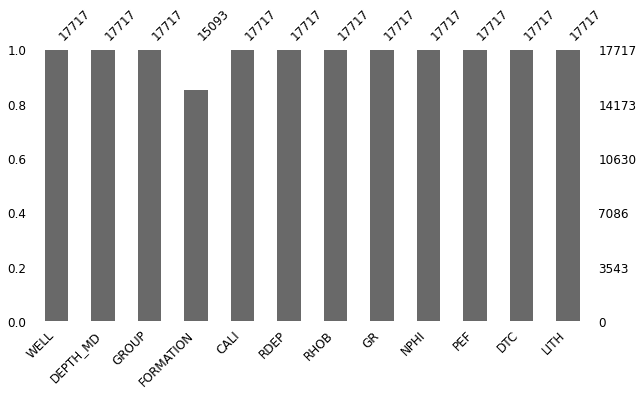

In [6]:
import missingno
missingno.bar(df, figsize=(10,5), fontsize=12)

In [57]:
#df.to_excel('Xeek_Well_15-9-15_NPHI_Transform.xlsx')

In [39]:
#df['RHOB'] = df['RHOB'].fillna(df['RHOB'].groupby(df['LITH']).transform('mean'))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17717 entries, 0 to 17716
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       17717 non-null  object 
 1   DEPTH_MD   17717 non-null  float64
 2   GROUP      17717 non-null  object 
 3   FORMATION  15093 non-null  object 
 4   CALI       17717 non-null  float64
 5   RDEP       17717 non-null  float64
 6   RHOB       17717 non-null  float64
 7   GR         17717 non-null  float64
 8   NPHI       17717 non-null  float64
 9   PEF        17717 non-null  float64
 10  DTC        17717 non-null  float64
 11  LITH       17717 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


In [8]:
df = df.drop(['FORMATION', 'WELL', 'GROUP'], axis=1)

<AxesSubplot:>

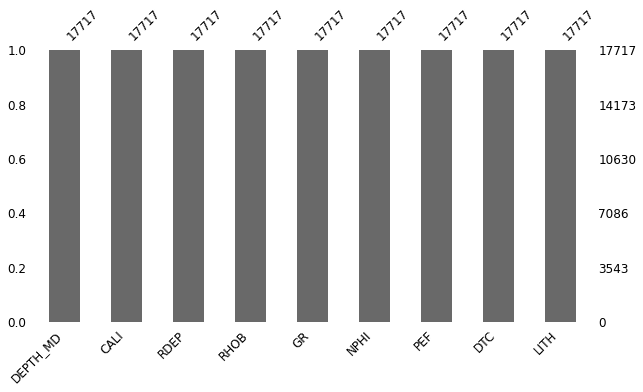

In [9]:
missingno.bar(df, figsize=(10,5), fontsize=12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17717 entries, 0 to 17716
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH_MD  17717 non-null  float64
 1   CALI      17717 non-null  float64
 2   RDEP      17717 non-null  float64
 3   RHOB      17717 non-null  float64
 4   GR        17717 non-null  float64
 5   NPHI      17717 non-null  float64
 6   PEF       17717 non-null  float64
 7   DTC       17717 non-null  float64
 8   LITH      17717 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.2+ MB


SAVING CLEAN FILE TO EXCEL

In [72]:
#df.to_excel('Xeek_Well_15-9-15_cleaned.xlsx')

In [99]:
df['LITH'].value_counts()

Shale              10872
Sandstone           2722
Sandstone/Shale     1729
Chalk                969
Limestone            905
Marl                 385
Tuff                 135
Name: LITH, dtype: int64

# 4. Encoding Data

In [171]:
#dummies = pd.get_dummies(df['LITH'], drop_first=True)

In [172]:
#df_final = df.join(dummies)

# 5. Split Data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(['LITH'],axis=1)
y = df['LITH']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 6. Scaling Data

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 6. Choosing The Best ML Model & Hyperparameters For Our Dataset

In [17]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
model_params = {
    'SVM': {
        'model': svm.SVC(),
        'params': {
            'C':[1,3,5,10],
            'kernel':['rbf', 'poly', 'linear']
        }
    },
    'rfc': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[30, 50, 100, 200],
            'max_features': [2,3,5]
        }
    }
}

In [18]:
score = []

for model_name, mp in model_params.items():
    grid = GridSearchCV(mp['model'], mp['params'], cv=10)
    grid.fit(scaled_X_train, y_train)
    score.append({
        'model': model_name,
        'best_score': grid.best_score_,
        'best_params': grid.best_params_
    })

In [19]:
df_score = pd.DataFrame(score)
df_score

NameError: name 'score' is not defined

# 7. Modelling and Evaluating

In [20]:
rfc = RandomForestClassifier(n_estimators=200, max_features=3)
svc = svm.SVC(C=10, kernel='rbf')

In [61]:
from sklearn.metrics import classification_report,plot_confusion_matrix, confusion_matrix

**A. Random Forest Prediction Model**

In [92]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=200)

In [93]:
pred1 = rfc.predict(X_test)

In [94]:
rfc_score_train = rfc.score(X_train, y_train)
rfc_score_test = rfc.score(X_test, y_test)

print(f'score_train:', (rfc_score_train))
print(f'score_test:', (rfc_score_test))

score_train: 1.0
score_test: 0.9557938299473289


In [95]:
cf_matrix = confusion_matrix(y_test,pred1)
cf_matrix

array([[ 299,    0,    0,    0,    0,    0,    0],
       [   0,  202,    7,    3,    0,   40,    1],
       [   7,    3,  101,    0,    2,    0,    0],
       [   0,    1,    1,  824,   36,    5,    0],
       [   0,    0,    1,   23,  425,   37,    0],
       [   0,    9,    0,    2,   43, 3200,    0],
       [   0,    0,    0,    0,    0,   14,   30]], dtype=int64)

In [117]:
print(classification_report(y_test, pred1))

                 precision    recall  f1-score   support

          Chalk       0.98      1.00      0.99       299
      Limestone       0.94      0.80      0.86       253
           Marl       0.92      0.89      0.91       113
      Sandstone       0.97      0.95      0.96       867
Sandstone/Shale       0.84      0.87      0.86       486
          Shale       0.97      0.98      0.98      3254
           Tuff       0.97      0.68      0.80        44

       accuracy                           0.96      5316
      macro avg       0.94      0.88      0.91      5316
   weighted avg       0.96      0.96      0.96      5316



Text(69.0, 0.5, 'Predicted value')

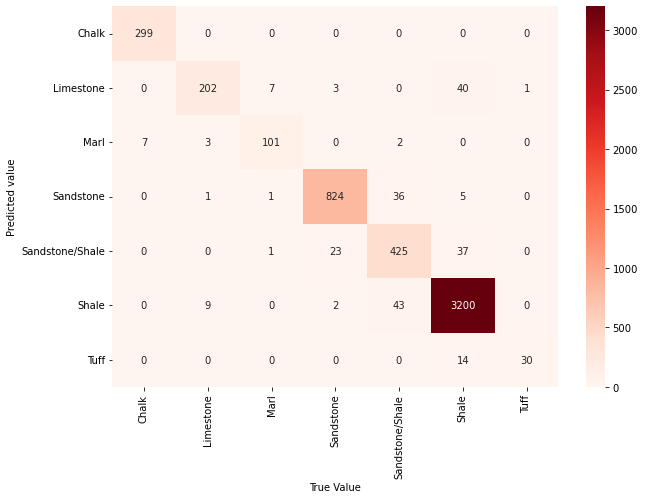

In [115]:
labels = ['Shale', 'Sandstone/Shale', 'Sandstone', 'Limestone', 'Tuff',
       'Marl', 'Chalk']
labels.sort()

fig, ax = plt.subplots(figsize=(10, 7))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels, yticklabels=labels,)

ax.set_xlabel('True Value')
ax.set_ylabel('Predicted value')

**Feature Importance Random Forest Classifier**

In [35]:
feat_df = pd.DataFrame(
    rfc.feature_importances_, columns=['feature importance'], 
    index=X_train.columns).sort_values(
    'feature importance', ascending=False)

# Print the 5 highest features in terms of importance
print(feat_df.head())

          feature importance
GR                  0.336352
DEPTH_MD            0.193726
NPHI                0.160684
CALI                0.085532
DTC                 0.077974


In [47]:
col_sorted_by_importance=rfc.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X_test.columns[col_sorted_by_importance],
    'imps':rfc.feature_importances_[col_sorted_by_importance]
})

import plotly.express as px
px.bar(feat_imp, x='cols', y='imps')

**Permutation Importance**

In [48]:
# Import eli5
import eli5
from eli5.sklearn import PermutationImportance

# Create a permutation importance plot
perm_imp = PermutationImportance(rfc, random_state=42).fit(scaled_X_test, y_test)
eli5.show_weights(perm_imp, feature_names=X_test.columns.tolist())

**B. Support Vector Classification Prediction Evaluation**

In [87]:
svc.fit(X_train, y_train)

SVC(C=10)

In [88]:
svc_score_train = svc.score(X_train, y_train)
svc_score_test = svc.score(X_test, y_test)

print(f'score_train:', (svc_score_train))
print(f'score_test:', (svc_score_test))

score_train: 0.839609708894444
score_test: 0.8372836719337848


In [89]:
pred2 = svc.predict(X_test)

In [90]:
cf_matrix_svc = confusion_matrix(y_test,pred2)
cf_matrix_svc

array([[ 299,    0,    0,    0,    0,    0,    0],
       [ 170,   20,    0,    6,    1,   56,    0],
       [  18,   91,    2,    0,    0,    2,    0],
       [   0,   53,   11,  720,   61,   22,    0],
       [   0,    5,   23,   48,  269,  141,    0],
       [   0,    0,    0,    5,  108, 3141,    0],
       [   0,    0,    0,    0,    0,   44,    0]], dtype=int64)

In [106]:
print(classification_report(y_test,pred2))

                 precision    recall  f1-score   support

          Chalk       0.61      1.00      0.76       299
      Limestone       0.12      0.08      0.09       253
           Marl       0.06      0.02      0.03       113
      Sandstone       0.92      0.83      0.87       867
Sandstone/Shale       0.61      0.55      0.58       486
          Shale       0.92      0.97      0.94      3254
           Tuff       0.00      0.00      0.00        44

       accuracy                           0.84      5316
      macro avg       0.46      0.49      0.47      5316
   weighted avg       0.81      0.84      0.82      5316



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Text(69.0, 0.5, 'Predicted value')

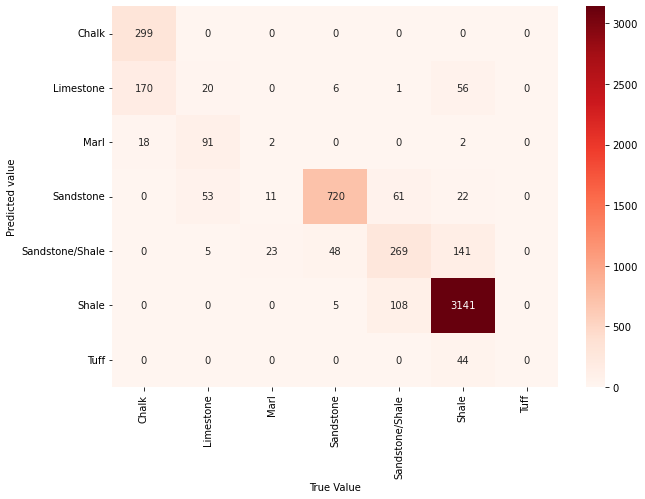

In [116]:
fig, ax = plt.subplots(figsize=(10, 7))
labels = ['Shale', 'Sandstone/Shale', 'Sandstone', 'Limestone', 'Tuff',
       'Marl', 'Chalk']
labels.sort()

ax = sns.heatmap(cf_matrix_svc, annot=True, cmap='Reds', fmt='.0f',
                xticklabels=labels, yticklabels=labels,)

ax.set_xlabel('True Value')
ax.set_ylabel('Predicted value')

# 8. Conclusion

Random Forest have a good performance than Support Vector Classifier for predicting the lithology. Random Forest has 95% accuracy, Support Vector Classifier has 84% accuracy. The top 3 most important feature that affect the ML model are GR, DEPTH, and NPHI, respectively.